# Displacements due to pressure variations in reservoir

This code aims at reproducing the results presented by Tempone et al. (201o, figs 5a and 5b)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker

In [2]:
import compaction as cp

In [3]:
def prism_layer(region, shape, bottom, top):
    '''
    Create a planar layer of prisms.
    '''
    y1, y2, x1, x2 = region
    assert y2 > y1, 'y2 must be greater than y1'
    assert x2 > x1, 'x2 must be greater than x1'
    assert bottom > top, 'bottom must be greater than top (z points downward)'
    dy = (y2 - y1)/shape[0]
    dx = (x2 - x1)/shape[1]
    layer = []
    y = y1
    for i in range(shape[0]):
        x = x1
        for j in range(shape[1]):
            layer.append([y, y+dy, x, x+dx, bottom, top])
            x += dx
        y += dy
    layer = np.array(layer)
    return layer

In [4]:
# Define the model
model = prism_layer([-500, 500, -500, 500], (1, 1), 900, 800)

In [5]:
# Pressure variation (in MPa)
DP = np.zeros(len(model)) - 10

In [6]:
# Young’s modulus (in MPa)
young = 2950

# Poisson coefficient
poisson = 0.25

In [7]:
# Define computation points on vertical plane at y = 0m
shape = (300, 120)
x = np.linspace(-1500, 1500, shape[0])
z = np.linspace(0, 1200, shape[1])
x, z = np.meshgrid(x, z)
x = x.ravel()
z = z.ravel()
y = np.zeros_like(x)
coordinates = np.vstack([y, x, z])

In [8]:
coordinates.shape

(3, 36000)

### Compute the displacement components by using Muñoz and Roehl (2017)

In [9]:
# Compute the x-component
u_x1 = cp.displacement(coordinates, model, DP, poisson, young, field='u_x1_MR')

u_x2 = cp.displacement(coordinates, model, DP, poisson, young, field='u_x2_MR')

u_xz2 = cp.displacement(coordinates, model, DP, poisson, young, field='u_xz2_MR')

u_x = u_x1 + (3 - 4*poisson)*u_x2 + u_xz2

In [10]:
# Compute the y-component
u_y1 = cp.displacement(coordinates, model, DP, poisson, young, field='u_y1_MR')

u_y2 = cp.displacement(coordinates, model, DP, poisson, young, field='u_y2_MR')

u_yz2 = cp.displacement(coordinates, model, DP, poisson, young, field='u_yz2_MR')

u_y = u_y1 + (3 - 4*poisson)*u_y2 + u_yz2

In [11]:
# Compute the z-component
u_z1 = cp.displacement(coordinates, model, DP, poisson, young, field='u_z1_MR')

u_z2 = cp.displacement(coordinates, model, DP, poisson, young, field='u_z2_MR')

u_zz2 = cp.displacement(coordinates, model, DP, poisson, young, field='u_zz2_MR')

u_z = u_z1 + (3 - 4*poisson)*u_z2 + u_zz2

In [12]:
# horizontal component
u_horizontal = np.sqrt(u_x**2 + u_y**2)

### Results obtained with Muñoz and Roehl (2017)

In [13]:
x = np.linspace(-1500, 1500, shape[0])
z = np.linspace(0, 1200, shape[1])

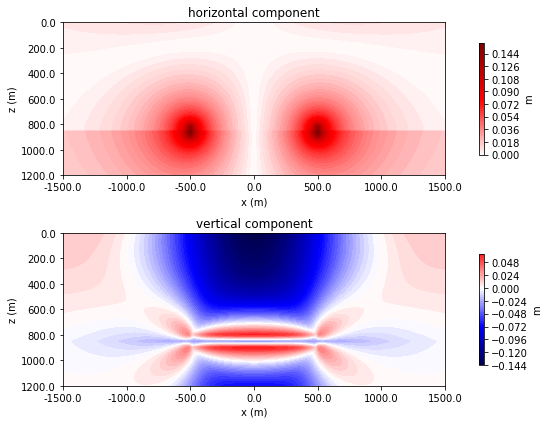

In [14]:
# Plot the results on a map
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False, figsize=(12,6))

ax[0].set_aspect("equal")
# Get the maximum absolute value so we can center the colorbar on zero
maxabs = np.max(np.abs(u_horizontal))
img = ax[0].contourf(x, z, u_horizontal.reshape(shape[::-1]), 
                  60, vmin=-maxabs, vmax=maxabs, cmap="seismic")
plt.colorbar(img, ax=ax[0], pad=0.04, shrink=0.73, label="m")
ax[0].set_title("horizontal component")

ax[0].set_xticklabels(ax[0].get_xticks())
ax[0].set_yticklabels(ax[0].get_yticks())
ax[0].invert_yaxis()
ax[0].set_xlabel("x (m)")
ax[0].set_ylabel("z (m)")

ax[1].set_aspect("equal")
# Get the maximum absolute value so we can center the colorbar on zero
maxabs = np.max(np.abs(u_z))
img = ax[1].contourf(x, z, u_z.reshape(shape[::-1]),  
                  60, vmin=-maxabs, vmax=maxabs, cmap="seismic")
plt.colorbar(img, ax=ax[1], pad=0.04, shrink=0.73, label="m")
ax[1].set_title("vertical component")

ax[1].set_xticklabels(ax[1].get_xticks())
ax[1].set_yticklabels(ax[1].get_yticks())
ax[1].invert_yaxis()
ax[1].set_xlabel("x (m)")
ax[1].set_ylabel("z (m)")

plt.tight_layout()
plt.show()